기울기 (slope) = 0.00112 [1/pm·kV]
y절편 (intercept) = -0.00539
결정계수 R² = 0.97876


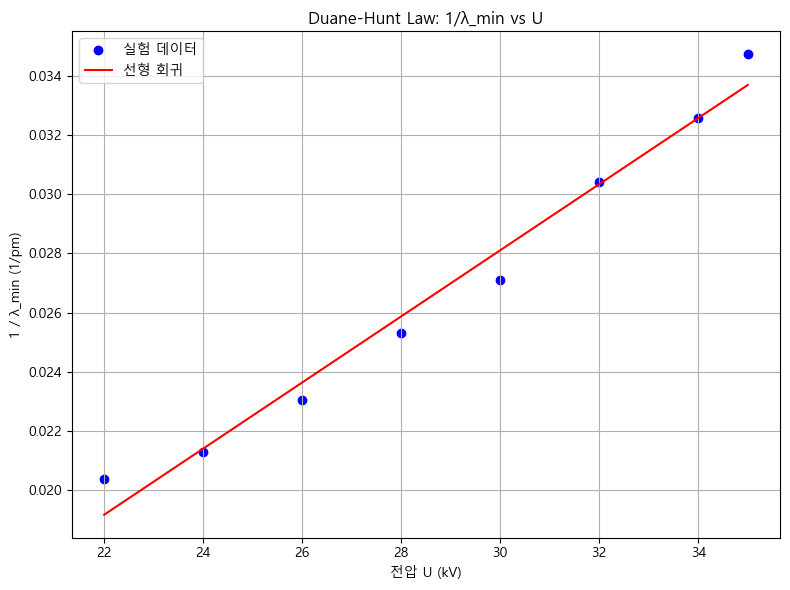

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from matplotlib import rcParams

# 한글 폰트 설정 (Windows)
rcParams['font.family'] = 'Malgun Gothic'
rcParams['axes.unicode_minus'] = False

# 1. 실험 데이터 입력
U_kV = np.array([35.0, 34.0, 32.0, 30.0, 28.0, 26.0, 24.0, 22.0])  # kV
lambda_pm = np.array([28.8, 30.7, 32.9, 36.9, 39.5, 43.4, 47.0, 49.1])  # pm

# 2. λ_min → 1/λ_min 계산 (단위: pm⁻¹)
inv_lambda = 1 / lambda_pm

# 3. 선형 회귀 분석
slope, intercept, r_value, p_value, std_err = linregress(U_kV, inv_lambda)

# 4. 결과 출력
print(f"기울기 (slope) = {slope:.5f} [1/pm·kV]")
print(f"y절편 (intercept) = {intercept:.5f}")
print(f"결정계수 R² = {r_value**2:.5f}")

# 5. 시각화
plt.figure(figsize=(8, 6))
plt.scatter(U_kV, inv_lambda, label='실험 데이터', color='blue')
plt.plot(U_kV, slope * U_kV + intercept, color='red', label='선형 회귀')
plt.xlabel("전압 U (kV)")
plt.ylabel("1 / λ_min (1/pm)")
plt.title("Duane-Hunt Law: 1/λ_min vs U")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


실험적 기울기: 8.754e+05 [1/(m·V)]
실험적 Planck 상수 h = 6.105e-34 J·s
이론적 Planck 상수 h = 6.626e-34 J·s
상대 오차 = 7.86 %
결정계수 R² = 0.98233


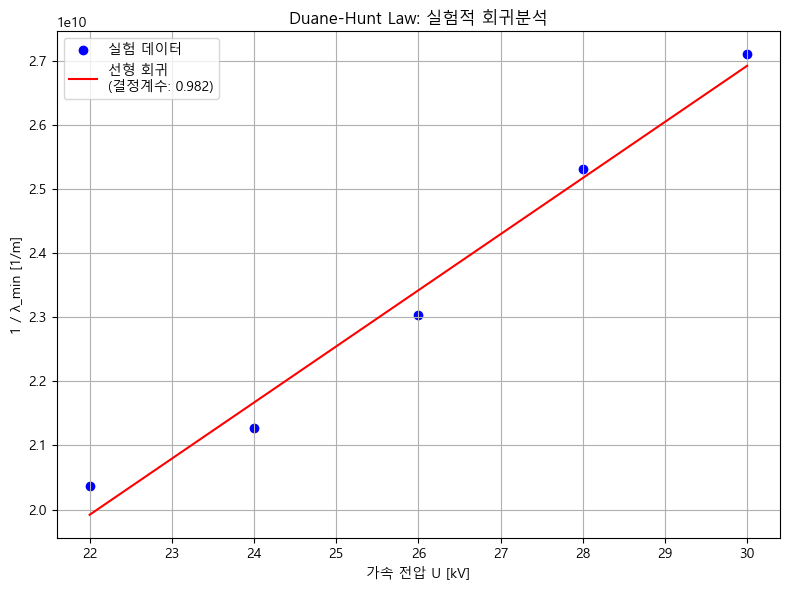

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from matplotlib import rcParams

# 한글 폰트 설정 (Windows)
rcParams['font.family'] = 'Malgun Gothic'
rcParams['axes.unicode_minus'] = False


# 1. 실험 데이터
U_kV = np.array([30.0, 28.0, 26.0, 24.0, 22.0])  # [kV] 35.0, 34.0, 32.0,
lambda_pm = np.array([36.9, 39.5, 43.4, 47.0, 49.1])  # [pm] 28.8, 30.7, 32.9,

# 2. 단위 변환
lambda_m = lambda_pm * 1e-12          # [pm] → [m]
inv_lambda = 1 / lambda_m             # [1/m]
U_V = U_kV * 1e3                      # [kV] → [V]

# 3. 선형 회귀 분석
slope, intercept, r_value, _, _ = linregress(U_V, inv_lambda)

# 4. 실험적으로 계산한 Planck 상수 h
e = 1.602176634e-19      # [C]
c = 2.99792458e8         # [m/s]
h_exp = e / (slope * c)  # [J·s]

# 5. 이론값 및 상대 오차
h_theory = 6.62607015e-34  # [J·s]
error_percent = abs(h_exp - h_theory) / h_theory * 100
r_squared = r_value**2

# 6. 결과 출력
print(f"실험적 기울기: {slope:.3e} [1/(m·V)]")
print(f"실험적 Planck 상수 h = {h_exp:.3e} J·s")
print(f"이론적 Planck 상수 h = {h_theory:.3e} J·s")
print(f"상대 오차 = {error_percent:.2f} %")
print(f"결정계수 R² = {r_squared:.5f}")

# 7. 시각화
plt.figure(figsize=(8, 6))
plt.scatter(U_V * 1e-3, inv_lambda, color='blue', label='실험 데이터')
plt.plot(U_V * 1e-3, slope * U_V + intercept, color='red', label=f'선형 회귀\n(결정계수: {r_squared:.3f})')
plt.xlabel("가속 전압 U [kV]")
plt.ylabel("1 / λ_min [1/m]")
plt.title("Duane-Hunt Law: 실험적 회귀분석")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


기울기 (보정 후): 6.970e+24 [1/(m·J)]
실험적 Planck 상수 h = 4.786e-34 J·s
이론적 Planck 상수 h = 6.626e-34 J·s
상대 오차 = 27.77 %
결정계수 R² = 0.97876


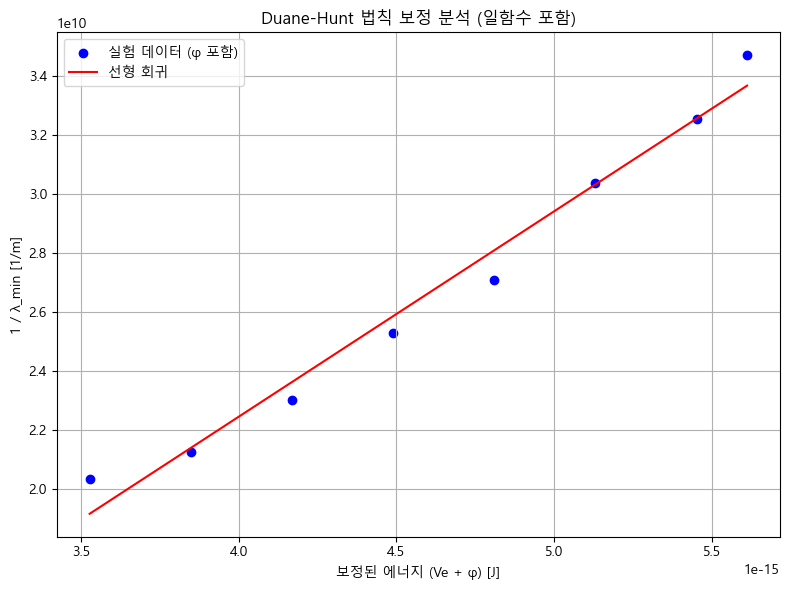

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# 실험 데이터
U_kV = np.array([35.0, 34.0, 32.0, 30.0, 28.0, 26.0, 24.0, 22.0])  # [kV]
lambda_pm = np.array([28.8, 30.7, 32.9, 36.9, 39.5, 43.4, 47.0, 49.1])  # [pm]

# 단위 변환
lambda_m = lambda_pm * 1e-12           # [pm] → [m]
inv_lambda = 1 / lambda_m              # [1/m]
U_V = U_kV * 1e3                       # [kV] → [V]

# 일함수 보정
phi_eV = 20.0  # [eV]
e = 1.602176634e-19  # [C]
phi_J = phi_eV * e   # [J]
U_J = U_V * e        # [J]
U_eff = U_J + phi_J  # 보정된 에너지 [J]

# 회귀 분석
slope, intercept, r_value, _, _ = linregress(U_eff, inv_lambda)

# Planck 상수 계산 (올바른 식)
c = 2.99792458e8  # [m/s]
h_exp = 1 / (slope * c)  # [J·s]
h_theory = 6.62607015e-34  # [J·s]
error_percent = abs(h_exp - h_theory) / h_theory * 100
r_squared = r_value**2

# 출력
print(f"기울기 (보정 후): {slope:.3e} [1/(m·J)]")
print(f"실험적 Planck 상수 h = {h_exp:.3e} J·s")
print(f"이론적 Planck 상수 h = {h_theory:.3e} J·s")
print(f"상대 오차 = {error_percent:.2f} %")
print(f"결정계수 R² = {r_squared:.5f}")

# 그래프
plt.figure(figsize=(8, 6))
plt.scatter(U_eff, inv_lambda, color='blue', label='실험 데이터 (φ 포함)')
plt.plot(U_eff, slope * U_eff + intercept, color='red', label='선형 회귀')
plt.xlabel("보정된 에너지 (Ve + φ) [J]")
plt.ylabel("1 / λ_min [1/m]")
plt.title("Duane-Hunt 법칙 보정 분석 (일함수 포함)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
